In [7]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv("insurance_dataset.csv")

## Figure 4:

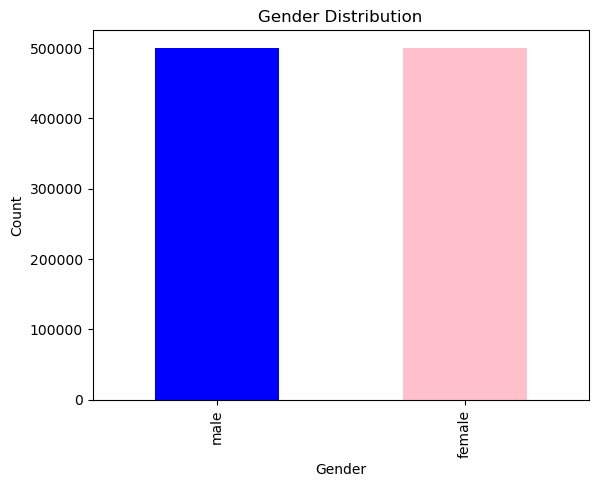

In [4]:
gender_counts = df['gender'].value_counts()
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

## Figure 5:

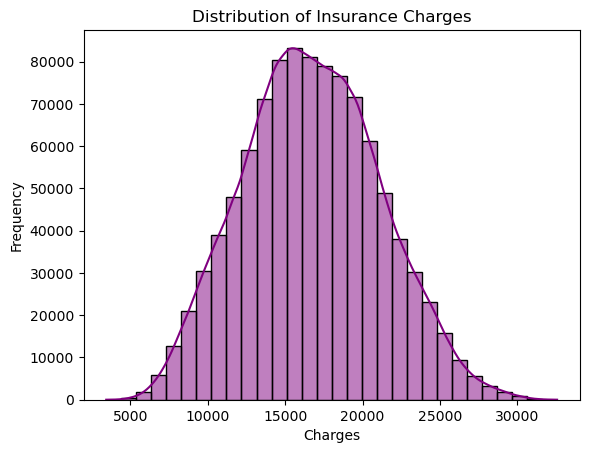

In [6]:
sns.histplot(df['charges'], kde=True, color='purple', bins=30)
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

## Figure 6:

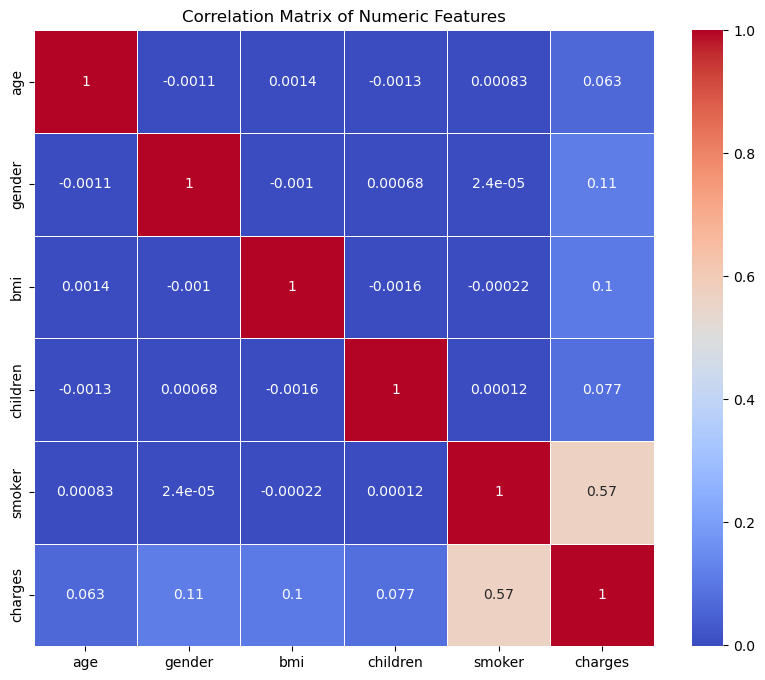

In [8]:
# Encode two columns to binary to include them in correlation matrix
df1 = df.copy()
le = LabelEncoder()
df1.gender = le.fit_transform(df1.gender)
df1.smoker = le.fit_transform(df1.smoker)


numeric_features = df1.select_dtypes(include=['float64', 'int64'])
correlation = numeric_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

## Figure 7:

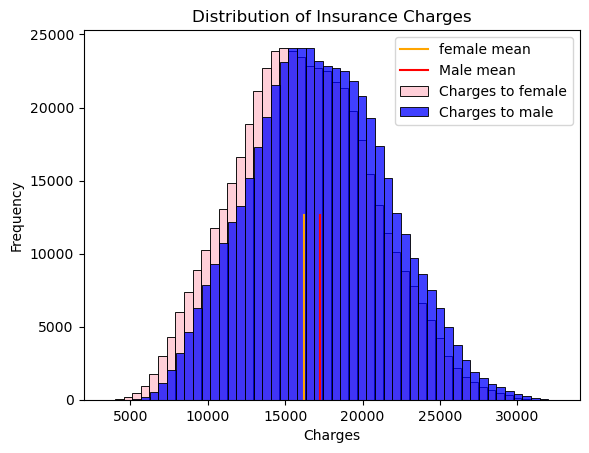

In [9]:
male = df[df.gender == 'male']
female = df[df.gender == 'female']

sns.histplot(female['charges'], color='pink', bins=50, label = 'Charges to female')
sns.histplot(male['charges'], color='blue', bins=50, label = 'Charges to male')
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')

plt.axvline(female.charges.mean(), 0, 0.5, color = 'orange', label = 'female mean')
plt.axvline(male.charges.mean(), 0, 0.5, color = 'red', label = 'Male mean')

plt.legend()
plt.show()

## Figure 8:

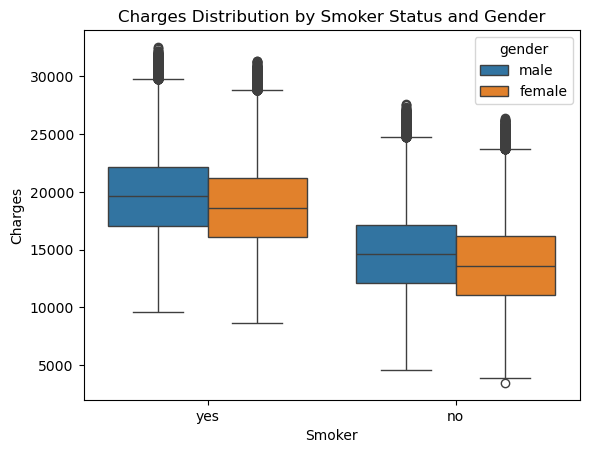

In [10]:
sns.boxplot(data=df, x='smoker', y='charges', hue='gender')
plt.title('Charges Distribution by Smoker Status and Gender')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

## Figure 9:

In [11]:
X = df.drop('charges', axis=1)

X.family_medical_history = X.family_medical_history.replace(np.nan, 'No history')
X.medical_history = X.medical_history.replace(np.nan, 'No history')
y = df['charges']

# Split data into train and test.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.30, random_state = 20)
X_train['charges'] = y_train
training = X_train.copy()

formula = 'charges ~ age + C(gender) + bmi + children + C(smoker) + C(region) + C(medical_history) + C(family_medical_history) + C(exercise_frequency) + C(occupation) + C(coverage_level)'
model = smf.ols(formula = formula, data = training).fit()

In [12]:
X_test['predictions'] = model.predict(X_test)
X_test['True Y'] = y_test
X_test['error'] = X_test['True Y'] - X_test.predictions

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


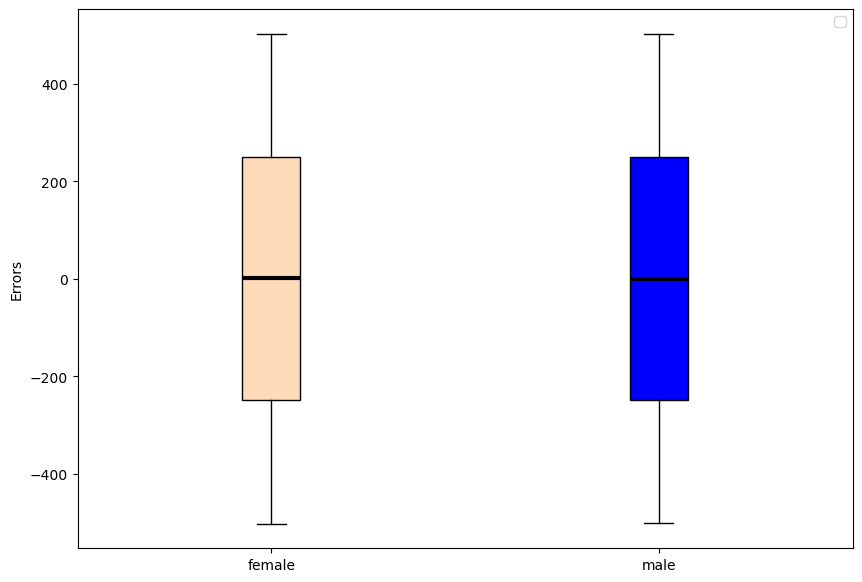

In [13]:
female = X_test[X_test['gender'] == 'female'].error
male = X_test[X_test['gender'] == 'male'].error

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

data = [female, male]
bplot = ax.boxplot(data,
                   patch_artist=True)

ax.set_xticklabels(['female', 'male'])

for patch, color in zip(bplot['boxes'], ['peachpuff', 'blue']):
    patch.set_facecolor(color)

for median in bplot['medians']:
    median.set(color ='black',
               linewidth = 3)

ax.set_ylabel('Errors')
ax.legend()
plt.show()